## Lab Notebook - Rift Inversion Project ##
This Jupyter notebooks serves as a record of modeling runs done on Stampede2 as part of the rift inversion project. Each cell includes a note of the current modeling goal and the code to generate the resulting models, as well as a report on the model results.

__NOTE__: Never run all cells, model inputs are designed to be temporary

In [1]:
import ripropagate

# Key function: generate
# Parameters in generate: lthick,evel,etime,output,ver,soft,shell,file

## 11/1/2021 ##
* Finished rifting of model with new inflow/outflow scheme (1025b) - making inversion for that now

In [2]:
ripropagate.generate(etime=32.5,evel=-1,output='./110121_ri_a',file='ri_base_iso_inflow.prm',soft=0.375,shell='run_base_nal.sh',
                    ver='a')

* Fastscape model with marine turned on crashed very quickly. Need to take a closer look at parameters.
* Made some changes after suggestions from Derek, going to try that out again.

In [3]:
ripropagate.generate(etime=12.5,evel=1,output='./110121_ri_b',file='ri_base_fs.prm',soft=0.375,shell='run_base_fsr.sh',
                    ver='b')

## 11/4/2021 ##
* Fastscape model (1101b) actually rifted successfully - trying the inversion next.

In [2]:
ripropagate.generate(etime=32.5,evel=-1,output='./110421_ri',file='ri_base_fs.prm',soft=0.375,shell='run_base_fsr.sh')

## 11/10/2021 ##
* Inversions of inflow and fastscape models proceeding. Finished inverting 2 isosurfaces model.
* Adding larger model domain to inflow model to see if it helps with edge effects

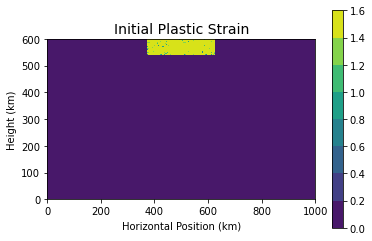

In [5]:
ripropagate.generate(etime=12.5,evel=1,output='./111021_ri',file='ri_base_iso_inflow_large.prm',soft=0.375,shell='run_base_fsr.sh',
                    depth=600)
ripropagate.comp_ascii(y=600,output='./111021_ri')

## 11/11/2021 ##
* Realized problem is persisting even with the new outflow scheme - going to try reverting back to cell averaging instead.

In [2]:
ripropagate.generate(etime=12.5,evel=1,output='./111121_ri_a',file='ri_base.prm',soft=0.375,shell='run_base_nal.sh',ver='a')

* Also doing a version of this with 1 km resolution throughout.

In [3]:
ripropagate.generate(etime=12.5,evel=1,output='./111121_ri_b',file='ri_base_hires.prm',soft=0.375,shell='run_base_nal.sh',ver='b')

## 11/17/2021 ##
* 1111a finished, so going to invert that.
* But also need to try this with the new inflow scheme, so adding that.
* 1111b is super slow, so not going to continue with that at the moment.

In [3]:
ripropagate.generate(etime=32.5,evel=-1,output='./111721_ri_a',file='ri_base.prm',soft=0.375,shell='run_base_nal.sh',ver='a')
ripropagate.generate(etime=12.5,evel=1,output='./111721_ri_b',file='ri_base_inflow.prm',soft=0.375,shell='run_base_nal.sh',ver='b')

## 11/22/2021 ##
* Discovered that 1111a went seriously wrong (rifting initialized on edge of model), so canceled 1117a. 
* 1117b almost done rifting, but also need to check that the same problem didn't occur.
* Pulling 1111b to see how hires version did as well.

## 11/24/2021 ##
* 1117b finished rifting, inverting that now.

In [2]:
ripropagate.generate(etime=32.5,evel=-1,output='./112421_ri',file='ri_base_inflow.prm',soft=0.375,shell='run_base_nal.sh')

## 12/8/2021 ##
* Going to attempt new rift model with larger model domain and significant mesh refinement.

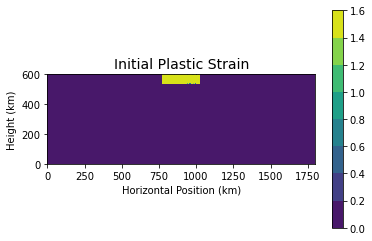

In [2]:
ripropagate.generate(etime=12.5,evel=1,output='./120821_ri',file='ri_base_inflow_large.prm',soft=0.375,depth=600,shell='run_base_nal.sh')
ripropagate.comp_ascii(x=1800,y=600,output='./120821_ri')

## 12/13/2021 ##
* A few issues with previous models - trying a model now with 400 km domain but with composition/temperature fixed at sides but vertical velocities allowed.

In [3]:
ripropagate.generate(etime=12.5,evel=1,output='./121321_ri',file='ri_base_inflow_tcfix.prm',soft=0.375,depth=400,shell='run_base_nal.sh')

## 12/15/2021 ##
* That crashed after 3.5 Myr, so reverting back to no fixed parameters at size but still new inflow/outflow scheme.

In [2]:
ripropagate.generate(etime=12.5,evel=1,output='./121521_ri',file='ri_base_inflow_nofix.prm',soft=0.375,depth=400,shell='run_base_nal.sh')

## 12/16/2021 ##
* That still crashed, so trying the same thing but with slightly larger model domain and coarsened resolution on the sides.
* Actually, scratch that, discovered major typo in velocity function (p1 was incorrectly smaller than p2, so going back to model with fixed velocity,temp,comp on sides with correct velocities)

In [3]:
ripropagate.generate(etime=12.5,evel=1,output='./121621_ri',file='ri_base_inflow.prm',soft=0.375,depth=400,shell='run_base_nal.sh')

## 12/17/2021 ##
* New model appears to have rifted successfully. Inverting now.

In [2]:
ripropagate.generate(etime=32.5,evel=-1,output='./121721_ri',file='ri_base_inflow.prm',soft=0.375,depth=400,shell='run_base_nal.sh')

## 12/22/2021 ##
* Inversion is generally looking good, though needs CFL at 0.5 and timestep at 20000 to go fast enough. Trying a comparable version with mantle down to 600 km and wider transition velocity zone.

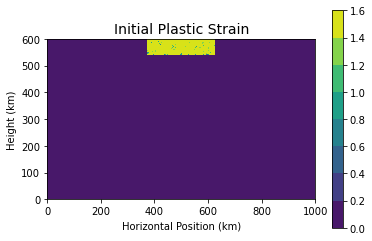

In [3]:
ripropagate.generate(etime=12.5,evel=1,output='./122221_ri',file='ri_base_600.prm',soft=0.375,depth=600,
                     p1=400,p2=200,shell='run_base_nal.sh')
ripropagate.comp_ascii(x=1000,y=600,output='./122221_ri')